### Comparing several classification algorigthms using the Iris flower dataset

The idea here is to see graphically how the different classifications algorithms predict classification boundaries. Here we will use just two features so that we can visually inspect the boundaries with a heat map. Additionally we will keep classification to one type for simplicity.

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
# Types of flowers
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
# Flower features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Select two features as one flower type for testing
X = iris.data[:,(2,3)]
y = (iris["target"]==2).astype(np.float64)

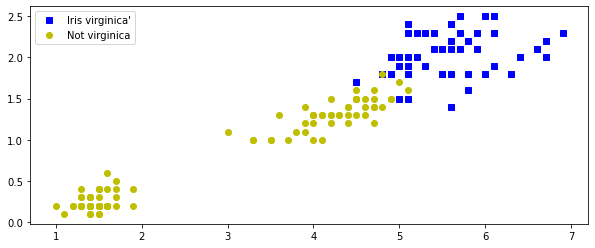

In [5]:
# Quick look at the data
plt.figure(figsize=(10, 4))
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris virginica'")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Not virginica")
plt.legend()

In [191]:
# Create plotting fxn, This function creates a two grid
# to make predictions and then draw a contour. Additionally
# it plots the data on top.
def plot_iris_results(clf, ax, scaler=scaler):
    
    # Create grid of predictions
    x0, x1 = np.meshgrid(
            np.linspace(0, 8, 500).reshape(-1, 1),
            np.linspace(0, 3.5, 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    if scaler is None:
        # Make sure to scale
        X_new_scaled = scaler.transform(X_new)

        # Predict
        y_predict = clf.predict(X_new_scaled)

    else:
        y_predict = clf.predict(X_new)
        
    # Make into grid
    zz = y_predict.reshape(x0.shape)

    # Plot
    ax.contourf(x0, x1, zz, cmap='bone')
    ax.plot(X[y==1, 0], X[y==1, 1], 'ow',markeredgecolor=[.5,.5,.5], label="Iris virginica'")
    ax.plot(X[y==0, 0], X[y==0, 1], 'o',markeredgecolor=[.5,.5,.5],color=[0.25, 0.25, 0.25], label="Not virginica")
    ax.legend()
    ax.set_xlabel(iris['feature_names'][2])
    ax.set_ylabel(iris['feature_names'][3])
    
    # Control colorscale
    #plt.gca()
    #plt.clim(0, 150) 
  

### Linear Support Vector Machine

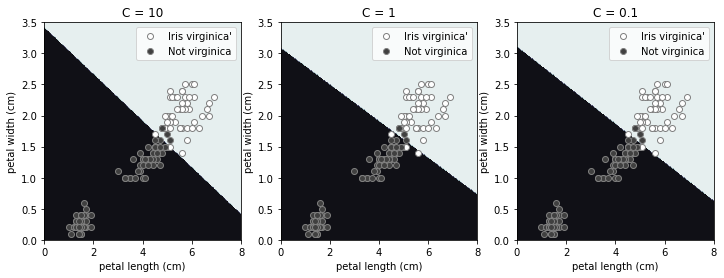

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
scaler = StandardScaler()

# Plot model solution and data
fig, axs = plt.subplots(1,3,figsize=(12,4))

# Linear SVM
svm_clf = LinearSVC(C=10, loss="hinge", max_iter=500)
scaled_svm_clf = Pipeline([
    ('scaler', scaler),
    ('linear_scv', svm_clf),
])
scaled_svm_clf.fit(X, y)
plot_iris_results(scaled_svm_clf,axs[0],scaler)
axs[0].set_title('C = 10')

svm_clf = LinearSVC(C=1, loss="hinge", max_iter=500)
scaled_svm_clf = Pipeline([
    ('scaler', scaler),
    ('linear_scv', svm_clf),
])
scaled_svm_clf.fit(X, y)
plot_iris_results(scaled_svm_clf,axs[1],scaler)
axs[1].set_title('C = 1')

svm_clf = LinearSVC(C=.1, loss="hinge", max_iter=500)
scaled_svm_clf = Pipeline([
    ('scaler', scaler),
    ('linear_scv', svm_clf),
])
scaled_svm_clf.fit(X, y)
plot_iris_results(scaled_svm_clf,axs[2],scaler)
axs[2].set_title('C = 0.1')

plt.show()

### Non-linear SVM

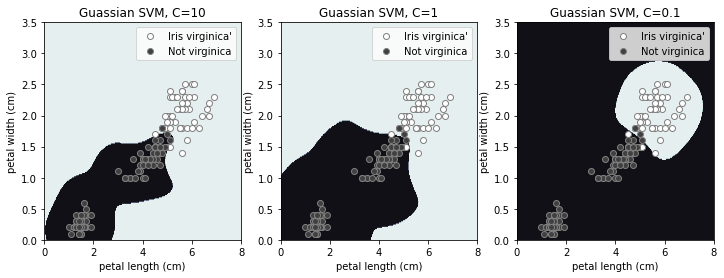

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
scaler = StandardScaler()

# Plot model solution and data
fig, axs = plt.subplots(1,3,figsize=(12,4))


nl_svm_clf = SVC(kernel="rbf", gamma=5, C=10)
scaled_nl_svm_clf = Pipeline([
    ('scaler', scaler),
    ('nonlinear_scv', nl_svm_clf),
])
scaled_svm_clf.fit(X, y)
scaled_nl_svm_clf.fit(X, y)
plot_iris_results(scaled_nl_svm_clf,axs[0],scaler)
axs[0].set_title('Guassian SVM, C=10')

nl_svm_clf = SVC(kernel="rbf", gamma=5, C=1)
scaled_nl_svm_clf = Pipeline([
    ('scaler', scaler),
    ('nonlinear_scv', nl_svm_clf),
])
scaled_svm_clf.fit(X, y)
scaled_nl_svm_clf.fit(X, y)
plot_iris_results(scaled_nl_svm_clf,axs[1],scaler)
axs[1].set_title('Guassian SVM, C=1')

nl_svm_clf = SVC(kernel="rbf", gamma=5, C=0.1)
scaled_nl_svm_clf = Pipeline([
    ('scaler', scaler),
    ('nonlinear_scv', nl_svm_clf),
])
scaled_svm_clf.fit(X, y)
scaled_nl_svm_clf.fit(X, y)
plot_iris_results(scaled_nl_svm_clf,axs[2],scaler)
axs[2].set_title('Guassian SVM, C=0.1')


plt.show()

### Decision Tree

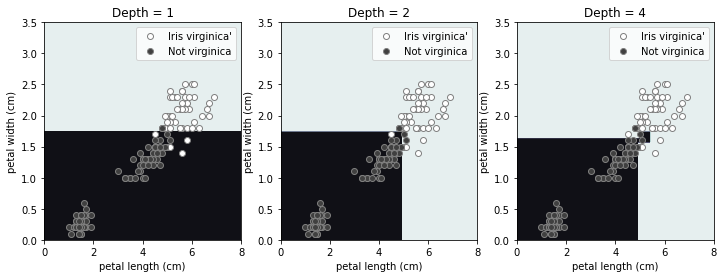

In [181]:
from sklearn.tree import DecisionTreeClassifier

fig, axs = plt.subplots(1,3,figsize=(12,4))

tree_clf = DecisionTreeClassifier(max_depth=1)
tree_clf.fit(X,y)
plot_iris_results(tree_clf,axs[0])
axs[0].set_title('Depth = 1')

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)
plot_iris_results(tree_clf,axs[1])
axs[1].set_title('Depth = 2')

tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X,y)
plot_iris_results(tree_clf,axs[2])
axs[2].set_title('Depth = 4')

plt.show()

### Random Forrest

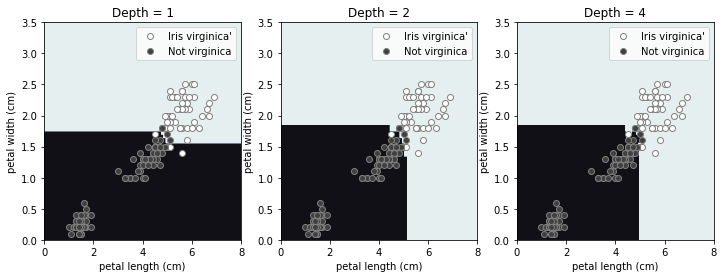

In [170]:
from sklearn.ensemble import RandomForestClassifier

fig, axs = plt.subplots(1,3,figsize=(12,4))

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=1)
rf_clf.fit(X,y)
plot_iris_results(rf_clf,axs[0])
axs[0].set_title('Depth = 1')

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=2)
rf_clf.fit(X,y)
plot_iris_results(rf_clf,axs[1])
axs[1].set_title('Depth = 2')

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf_clf.fit(X,y)
plot_iris_results(rf_clf,axs[2])
axs[2].set_title('Depth = 4')

plt.show()

### Neural Network, MLP Classifier

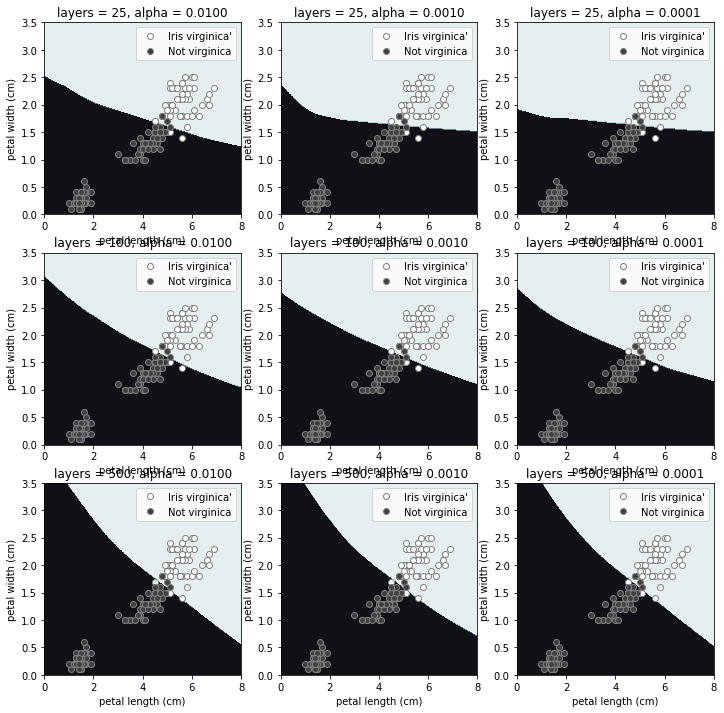

In [192]:
from sklearn.neural_network import MLPClassifier

fig, axs = plt.subplots(3,3,figsize=(12,12))
# axs = axs.ravel() # Make matrix a list

vlayer = [25, 100, 500]
valpha = [0.01, 0.001, 0.0001]

for i, layer in enumerate(vlayer):
    for j, alpha in enumerate(valpha):
        
        mlp_clf = MLPClassifier(max_iter=5000, hidden_layer_sizes=layer, alpha=alpha)
        mlp_clf.fit(X,y)
        plot_iris_results(mlp_clf,axs[i,j])
        axs[i,j].set_title('layers = {:d}, alpha = {:.4f}'.format(layer,alpha))

plt.show()

### Neural Network Regressor

RuntimeError: You must first define an image, e.g., with imshow

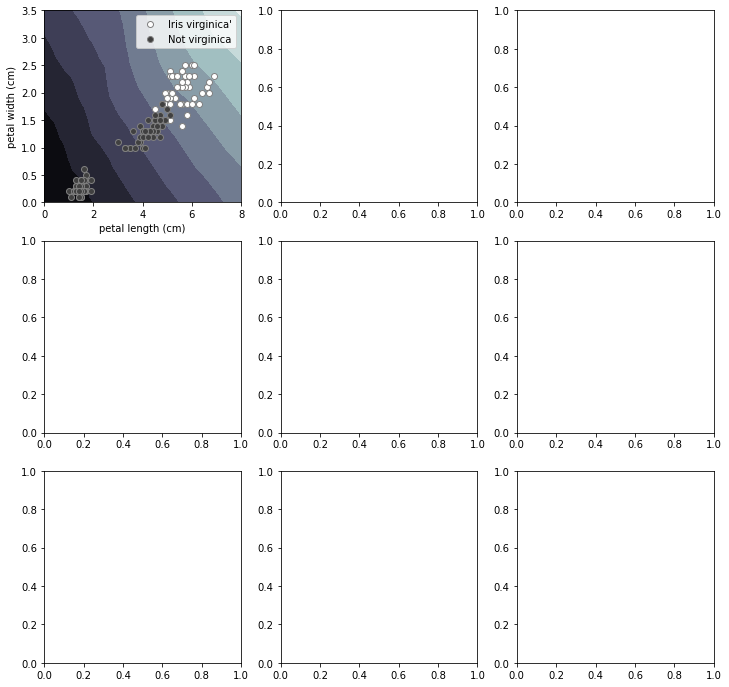

In [188]:
from sklearn.neural_network import MLPRegressor

fig, axs = plt.subplots(3,3,figsize=(12,12))
axs = axs.ravel()

for ii in range(9):
    mlp_clf = MLPRegressor(max_iter=5000, hidden_layer_sizes=100, alpha=0.0001)
    mlp_clf.fit(X,y)
    plot_iris_results(mlp_clf,axs[ii])
    if ii == 1:
        axs[ii].set_title('Random realizations')
        
plt.show()    